# Python-MLearning: Digits Recognition using Neural Network (NN), PCA, and  Sklearn Library

By: Hector Alvaro Rojas &nbsp;&nbsp;|&nbsp;&nbsp; Data Science, Visualizations and Applied Statistics &nbsp;&nbsp;|&nbsp;&nbsp; July 18, 2018<br>
    Url: [http://www.arqmain.net]   &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]
    <hr>

# I GENERALITIES

This paper deals with an application of the Neural Network (NN) algorithm to the MNIST database, in order to obtain a model that allows to recognize handwritten digits and classify them in an appropriate way.

The model obtained consider the PCA components of the database (154) that explain 95% of the total variation of the data.

RandomizedSearchCV search is used to access suitable hyperparameters within a proposed range.

The MNIST database is available at http://yann.lecun.com/exdb/mnist/. The present project initially considers a complete version of MINIST called "mnist_My.csv" which includes the 70 thousand original images. This is achieved by joining the training (60,000 images) and testing (10,000) files that are usually delivered separately.

RandomizedSearchCV takes a non-depressible time to access the results. However, I considered appropriate to keep all the data, in order to present the most implicit situation in the most realistic way possible.

In another parallel project, I present a comparison between several classifications models applied to the same MNIST base. In this work, I consider only a small sample to perform the search, and then I project the results to the remaining base. Of course, all this is done with the ultimate goal of reducing processing times, nothing more.

Finally, a way to explore the MNIST database can be found [here](http://www.arqmain.net/Researches/Researchs/Digit_Recognition/Exploratory_DAnalysis/Exploratory_DAnalysis_MNIST_RProject.html).


# II IMPORT REQUIRED PACKAGES

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as pl
%matplotlib inline
from datetime import datetime
# machine learning
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#3.2.4.3.1. sklearn.ensemble.RandomForestClassifier
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# III LOADING DATA

In [2]:
#Checking working directory
# import os
os.getcwd()

'C:\\Users\\Alvaro\\Documents\\R-Python-Projects_April042018\\Python_Projects\\Machine-Learning\\NNetwork\\NN3'

In [3]:
#List files in a directory
os.listdir()

['.ipynb_checkpoints',
 'Links to NN3 GITHUBE and Nbviewer.txt',
 'PYTHON-MLearning_NN3_Final.ipynb']

In [5]:
# read csv (comma separated value) into data
data=pd.read_csv('..\\..\\Randomforest\\RandomForest2\\mnist_My.csv')
data.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [6]:
y_data = data['label'].values
X_data = data.drop('label', axis=1).values                   
data.shape, y_data.shape, X_data.shape

((70000, 785), (70000,), (70000, 784))

# IV MODELING

## Train and Validation Datasets

In [8]:
#Divide data_pca and Y_data into train and test data
X_train, X_test, y_train_pc,  y_test_pc = train_test_split(X_data, y_data, test_size=0.30, random_state=0,
                                                                                      stratify= y_data, shuffle=True)
X_train.shape, X_test.shape, y_train_pc.shape, y_test_pc.shape

((49000, 784), (21000, 784), (49000,), (21000,))

## Reduce dimension using PCA

### Reduce dimension general analysis

In [10]:
#Reduce dimension into 95% information
pca = PCA(0.95)
X_data_pca = pca.fit_transform(X_data)
X_data_pca.shape

(70000, 154)

Text(0,0.5,'cumulative explained variance')

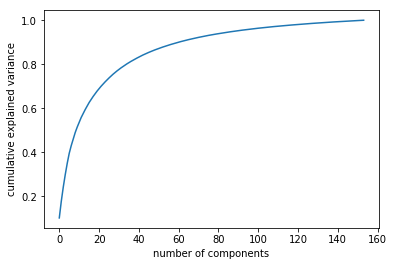

In [11]:
#plot to visualize % of total variance accumulated by the components
pca = PCA().fit(X_data_pca)
pl.plot(np.cumsum(pca.explained_variance_ratio_))
pl.xlabel('number of components')
pl.ylabel('cumulative explained variance')

Text(0.5,1,'Projection on the Two First Principal Components ')

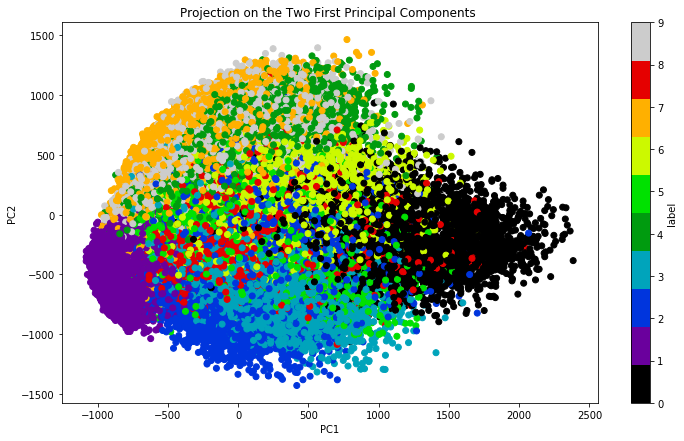

In [12]:
#plot of two first components
pl.subplots(nrows=1, ncols=1, figsize=(12,7))
pl.scatter(X_data_pca[:,0], X_data_pca[:,1], c=y_data, cmap=pl.get_cmap('nipy_spectral', 10))
pl.colorbar(label='label')
pl.xlabel('PC1')
pl.ylabel('PC2')
pl.title('Projection on the Two First Principal Components ')
#cbar = plt.colorbar()
#cbar.set_label('Time [ps]')

## Reduce dimension into 95% information

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=154)  
X_train_pca = pca.fit_transform(X_train)  
X_test_pca = pca.transform(X_test)
data_pca = pca.transform(X_data)

X_train_pca.shape, X_test_pca.shape, data_pca.shape

((49000, 154), (21000, 154), (70000, 154))

## Build Model

### What values for the model's hyperparameters would be selected?

In [15]:
# Import necessary modules
from scipy.stats import randint
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

startTime = datetime.now()
# Setup the parameters and distributions to sample from: param_dist
param_dist = {'alpha': [10, 1, 0.01],
'solver': ['lbfgs','adam'], 
'activation': ['logistic', 'relu']
}

# Instantiate MLP Classifier

mlp = MLPClassifier(hidden_layer_sizes=(16,16), random_state=7)


# Instantiate the RandomizedSearchCV object: mlp_cv
kfold = StratifiedKFold(n_splits=3, random_state=0)
mlp_cv = RandomizedSearchCV(mlp, param_dist, n_jobs=-1, cv=kfold)

# Fit it to the data
mlp_cv.fit(data_pca, y_data)
print ('Total running time (H: M: S. ThS)', datetime.now()-startTime, 'seconds.')


Total running time (H: M: S. ThS) 0:24:11.563025 seconds.


In [18]:
# Print the tuned parameters and score
print("Tuned NN Parameters: {}".format(mlp_cv.best_params_))
print("Best score is {}".format(mlp_cv.best_score_))


Tuned NN Parameters: {'solver': 'adam', 'alpha': 1, 'activation': 'relu'}
Best score is 0.9480428571428572


## Using the best parameters to Fit, Evaluate, and Make predictions

### Fitting the Model

In [10]:
# train your model using X_train, y_train and the best known parameters
startTime = datetime.now()
nnpca = MLPClassifier(solver='adam', activation = 'relu', hidden_layer_sizes=(16,16), alpha = 1, random_state=7)
nnpca.fit(X_train_pca, y_train_pca)
print ('Total running time (H: M: S. ThS)', datetime.now()-startTime, 'seconds.')

Total running time (H: M: S. ThS) 0:00:56.462230 seconds.


### Evaluating the Model

#### <font color=orange><i>Getting Accuracy and Confusion Matrix</i></font>

In [21]:
# Evaluating RF model
print('With NN full dataset () accuracy is: ',round(nnpca.score(X_train_pca,y_train_pca),4)) # accuracy 

With NN full dataset () accuracy is:  0.9721


In [55]:
predictions = nnpca.predict(X_test_pca)
print('Accuracy based on X_test, Y_test: ',accuracy_score(y_test_pca, predictions))
print('')
print('Confusion Matrix:\n ',confusion_matrix(y_test_pca, predictions))
print('With NN X_train_pca,y_train_pca dataset () accuracy is: ',round(nnpca.score(X_train_pca,y_train_pca),4)) # accuracy ',confusion_matrix(y_test, predictions))
print(classification_report(y_test_pca, predictions))

Accuracy based on X_test, Y_test:  0.9696666666666667

Confusion Matrix:
  [[2020    0   14    2    3    6    7    1   14    4]
 [   1 2325    9    6    2    0    0    6   10    4]
 [   6    7 2045    8   13    0    3    4    9    2]
 [   1    1   24 2079    1    9    0    4   15    8]
 [   2    0    2    0 1982    0    3    4    3   51]
 [   1    3    3   58    1 1798   12    0   10    8]
 [   5    4    2    0    7   16 2017    0   12    0]
 [   2    6   25   22    2    2    0 2104    6   19]
 [   8    5   18   10    4   13    4    2 1969   15]
 [   1    0    0   15   17   12    1   11    6 2024]]
With NN X_train_pca,y_train_pca dataset () accuracy is:  0.9708
             precision    recall  f1-score   support

          0       0.99      0.98      0.98      2071
          1       0.99      0.98      0.99      2363
          2       0.95      0.98      0.96      2097
          3       0.94      0.97      0.96      2142
          4       0.98      0.97      0.97      2047
          5

Precision, recall and f1-score are metrics to measure the accuracy of classification models. A general explanation can be got in [Wikipedia](https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers).

Based on NN testing datasets (X_test_pca, y_test_pca dataset), looks like we misclassified 637 digit's images, leaving us with a 96.97% accuracy rate  (with 97% precision and 97% recall). Meantime, With NN training datasets (X_train_pca, y_train_pca) accuracy is 97.08%

#### <font color=orange><i>Examining the Model's Mistakes</i></font>

Let us determine the examples in the validation set where the model predictions were wrong. These correspond to the elements of <font color=red>y_test</font> that are not equal to the same entry in <font color=red>predictions</font>. The numpy where function returns a list of indices that satisfy a condition, so the indices corresponding to the errors are

In [56]:
error_idx = np.where(y_test_pca != predictions)[0]
error_idx
#pd.Series(error_idx.tolist())

array([   14,    56,    98,   116,   227,   317,   361,   377,   397,
         417,   465,   520,   532,   533,   550,   552,   575,   636,
         667,   680,   710,   753,   779,   786,   822,   854,  1002,
        1012,  1094,  1194,  1204,  1217,  1225,  1230,  1295,  1301,
        1321,  1342,  1360,  1368,  1413,  1497,  1505,  1544,  1615,
        1669,  1789,  1851,  1868,  1891,  2020,  2074,  2097,  2144,
        2176,  2233,  2239,  2254,  2336,  2340,  2380,  2417,  2523,
        2538,  2578,  2617,  2626,  2631,  2664,  2752,  2873,  2907,
        2917,  3028,  3058,  3081,  3087,  3112,  3175,  3183,  3232,
        3265,  3354,  3371,  3459,  3460,  3530,  3537,  3587,  3621,
        3637,  3663,  3665,  3672,  3695,  3697,  3710,  3735,  3789,
        3795,  3798,  3812,  3818,  3848,  3850,  3873,  3910,  3937,
        3977,  4006,  4016,  4045,  4064,  4066,  4155,  4168,  4240,
        4253,  4334,  4339,  4393,  4437,  4448,  4506,  4541,  4553,
        4560,  4561,

In [57]:
len(error_idx)

637

We'll choose 20 indices at random from our error_idx array and plot the image, together with the prediction and the correct label:

In [58]:
rand_idx = np.random.choice(error_idx, size=20, replace=False)
rand_idx

array([11406, 20179, 13421,  9647,  6311, 13649,  7435,  4560,  3232,
       16849,  7294, 18614, 14457,  6659, 17713, 17978, 18118, 18191,
       18688,  5792], dtype=int64)

The PCA procedure of Sklearn allows us to move from a compressed representation (in our case 154 components) to an approximation of the original high-dimensional data (784 variables). This is really cool, isn’t it? o, now we use this option to generate the desired visualization.

In [62]:
Xtest784back = pca.inverse_transform(X_test_pca)

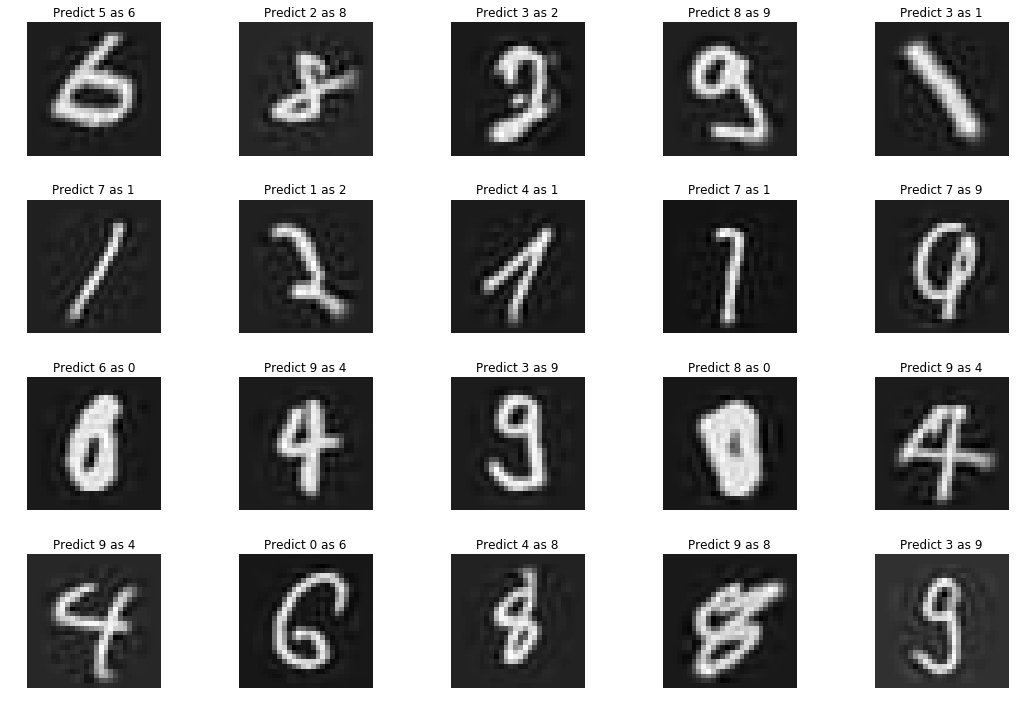

In [61]:
fig, axs = pl.subplots(nrows=4, ncols=5, figsize=(15,10))

i = 0
for ax in axs.reshape(-1):
    ax.set_title("Predict %d as %d" % (predictions[rand_idx[i]], y_test_pca[rand_idx[i]]))
    ax.imshow(Xtest784back[rand_idx[i]].reshape(28,28), cmap=pl.cm.gray, origin='upper', interpolation='nearest')
    ax.axis('off')
    i += 1
pl.tight_layout()    
pl.show()

In the exploratory stage of these data () it is concluded that we should expect that the model does not present an extremely high accuracy because the digits have different strokes and, in some cases, turn out to be very strange.
  
From the previous visualization, we can see that the errors of classification of the images are based on that, in general, we can find some cases in which the writing is deficient or the digit has a strange orientation.

This situation, which usually is not a real problem for a human being, constitutes a base of error not easy to overcome by a computational algorithm.

### Making Predictions

#### Based on the training dataset

The function cross_val_predict has a similar interface to cross_val_score, but returns, for each element in the input, the prediction that was obtained for that element when it was in the test set obtained from the partition over X_train (in our case).

In [31]:
predictions = cross_val_predict(nnpca, X_train_pca, y_train_pca, cv=3)
print('Prediction: {}', predictions)

Prediction: {} [7 6 9 ... 0 5 6]


#### Based on the test dataset

Now we used the function predict which is regularly the one to be used to get the predictions on a new dataset.  In our case, the new dataset is the X_test one. 

In [32]:
# train your model using all data.
startTime = datetime.now()
nnpca.fit(data_pca, y_data) 
print ('Total running time (H: M: S. ThS)', datetime.now()-startTime, 'seconds.')

Total running time (H: M: S. ThS) 0:01:01.698529 seconds.


In [33]:
predictions = nnpca.predict(X_test_pca)
print('Prediction: {}', predictions)

Prediction: {} [0 3 7 ... 0 6 6]


<hr>
By: Hector Alvaro Rojas &nbsp;&nbsp;|&nbsp;&nbsp; Data Science, Visualizations and Applied Statistics &nbsp;&nbsp;|&nbsp;&nbsp; July 18, 2018<br>
    Url: [http://www.arqmain.net]   &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]
    <hr>